In [ ]:
import os, shutil, sys, random
import numpy as np          
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras import layers, models, optimizers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from keras.models import Model,Sequential, Input, load_model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.preprocessing import image 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_curve, roc_auc_score, auc

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

#with tf.device('/gpu:0'):
#    model.fit(X, y, epochs=20, batch_size=128, callbacks=callbacks_list)

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from distutils.dir_util import copy_tree

copy_tree("/content/drive/MyDrive/data", "/covid_data/data")

['/covid_data/data/test/Healthy/Non-Covid (1020).png',
 '/covid_data/data/test/Healthy/Non-Covid (103).png',
 '/covid_data/data/test/Healthy/Non-Covid (1091).png',
 '/covid_data/data/test/Healthy/Non-Covid (1130).png',
 '/covid_data/data/test/Healthy/Non-Covid (1030).png',
 '/covid_data/data/test/Healthy/Non-Covid (1121).png',
 '/covid_data/data/test/Healthy/Non-Covid (1043).png',
 '/covid_data/data/test/Healthy/Non-Covid (1100).png',
 '/covid_data/data/test/Healthy/Non-Covid (1124).png',
 '/covid_data/data/test/Healthy/Non-Covid (1098).png',
 '/covid_data/data/test/Healthy/Non-Covid (1106).png',
 '/covid_data/data/test/Healthy/Non-Covid (1070).png',
 '/covid_data/data/test/Healthy/Non-Covid (1142).png',
 '/covid_data/data/test/Healthy/Non-Covid (1077).png',
 '/covid_data/data/test/Healthy/Non-Covid (1118).png',
 '/covid_data/data/test/Healthy/Non-Covid (12).png',
 '/covid_data/data/test/Healthy/Non-Covid (1082).png',
 '/covid_data/data/test/Healthy/Non-Covid (1053).png',
 '/covid_data

In [ ]:
while True:pass  #keep session alive

KeyboardInterrupt: ignored

In [ ]:
data = "/covid_data/data"

# train. val and test data paths:
train_data = data + "/train"
val_data = data + "/val"  
test_data = data + "/test"

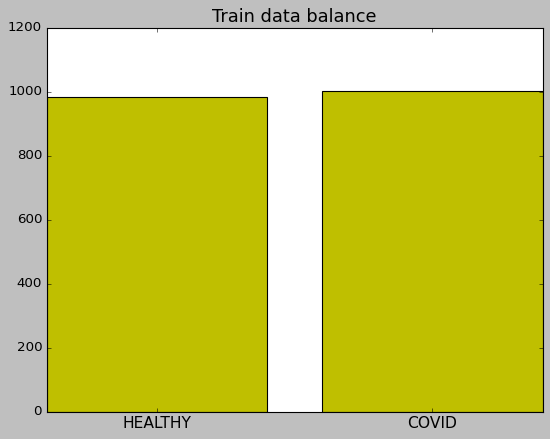

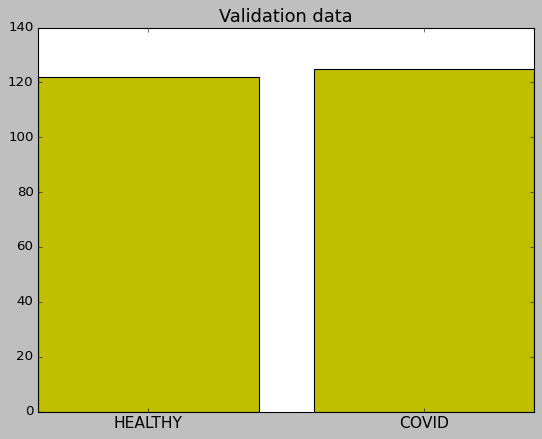

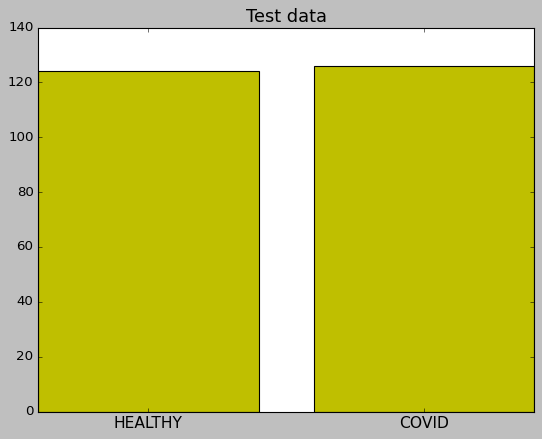

In [ ]:
healthy_count = len(os.listdir(data + "/train/Healthy"))
covid_count = len(os.listdir(data + "/train/Covid"))

#train data plot
plt.style.use('classic')
plt.figure()
bars = ('HEALTHY', 'COVID')
height = [healthy_count, covid_count]
plt.bar(np.arange(len(bars)), height, color='y')
plt.xticks(np.arange(len(bars)), bars, fontsize=14)
plt.title('Train data balance', x = 0.5, y = 1,fontsize = 16)
plt.show()

healthy_count = len(os.listdir(data + "/val/Healthy"))
covid_count = len(os.listdir(data + "/val/Covid"))

#val data plot
plt.style.use('classic')
plt.figure()
bars = ('HEALTHY', 'COVID')
height = [healthy_count, covid_count]
plt.bar(np.arange(len(bars)), height, color='y')
plt.xticks(np.arange(len(bars)), bars, fontsize=14)
plt.title('Validation data', x = 0.5, y = 1,fontsize = 16)
plt.show()

healthy_count = len(os.listdir(data + "/test/Healthy"))
covid_count = len(os.listdir(data + "/test/Covid"))

#test data plot
plt.style.use('classic')
plt.figure()
bars = ('HEALTHY', 'COVID')
height = [healthy_count, covid_count]
plt.bar(np.arange(len(bars)), height, color='y')
plt.xticks(np.arange(len(bars)), bars, fontsize=14)
plt.title('Test data', x = 0.5, y = 1,fontsize = 16)
plt.show()

In [ ]:
train_healthy_count = len(os.listdir(data + "/train/Healthy"))
train_covid_count = len(os.listdir(data + "/train/Covid"))

val_healthy_count = len(os.listdir(data + "/val/Healthy"))
val_covid_count = len(os.listdir(data + "/val/Covid"))

test_healthy_count = len(os.listdir(data + "/test/Healthy"))
test_covid_count = len(os.listdir(data + "/test/Covid"))

print("Train data count: " + str(train_healthy_count + train_covid_count))
print("Validation data count: " + str(val_healthy_count + val_covid_count))
print("Test data count: " + str(test_healthy_count + test_covid_count))

Train data count: 1984
Validation data count: 247
Test data count: 250


Healthy


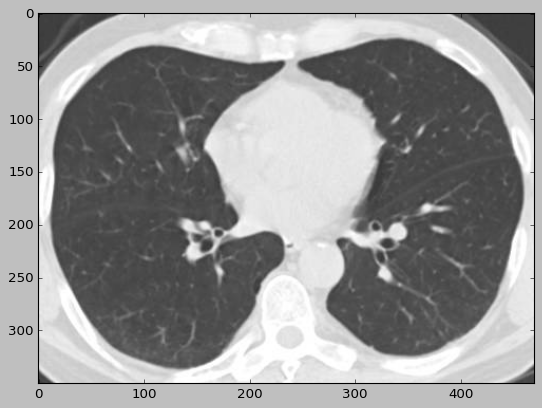

In [ ]:
x = random.randint(1001,1040)

img_nonCovid = ('/Non-Covid (' + str(x) + ').png')
img_nonCovid = load_img('/covid_data/data/train/Healthy' + img_nonCovid)

print('Healthy')
plt.imshow(img_nonCovid)
plt.show()

Covid


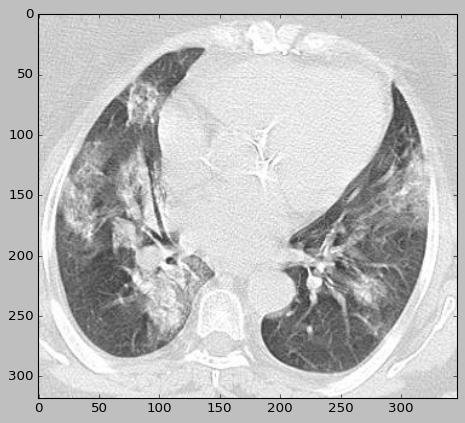

In [ ]:
x = random.randint(1001,1040)

img_Covid = ('/Covid (' + str(x) + ').png')
img_Covid = load_img('/covid_data/data/train/Covid' + img_Covid)

print('Covid')
plt.imshow(img_Covid)
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True,)

train_datagen_plain = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

batch_size = 64

train_generator = train_datagen.flow_from_directory(
train_data,
target_size = (128, 128),
batch_size = batch_size,
class_mode = 'binary',
shuffle = True)

train_generator_plain = train_datagen_plain.flow_from_directory(
train_data,
target_size = (128, 128),
batch_size = batch_size,
class_mode = 'binary',
shuffle = True)

validation_generator = test_datagen.flow_from_directory(
val_data,
target_size = (128, 128),
batch_size = batch_size,
class_mode = 'binary',
shuffle = True)

test_generator = test_datagen.flow_from_directory(
test_data,
target_size = (128, 128),
batch_size = 250,
class_mode ='binary',
shuffle = False)

Found 1984 images belonging to 2 classes.
Found 1984 images belonging to 2 classes.
Found 247 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


In [ ]:
y_true_labels = train_generator.classes
print(y_true_labels)

[0 0 0 ... 1 1 1]


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 61, 61, 256)       295168    
_________________________________________________________________
batch_normalization_28 (Batc (None, 61, 61, 256)       1024      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 256)      

In [ ]:
optimizer = optimizers.Adam(lr=0.01)

model.compile(loss='binary_crossentropy', 
              optimizer=optimizer, 
              metrics=['binary_accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
mc = ModelCheckpoint('model.{epoch:02d}-{val_binary_accuracy:.2f}.hdf5', 
                     monitor = 'val_binary_accuracy',
                     mode = 'max', 
                     save_best_only = True,
                     verbose=1)
cb_list_1 = [mc]

mc2 = ModelCheckpoint('model_plain.{epoch:02d}-{val_binary_accuracy:.2f}.hdf5', 
                     monitor = 'val_binary_accuracy',
                     mode = 'max', 
                     save_best_only = True,
                     verbose=1)
cb_list_2 = [mc2]

In [ ]:
train_steps = (train_healthy_count + train_covid_count) // batch_size
val_steps = (val_healthy_count + val_covid_count) // batch_size
print(train_steps)
print(val_steps)

31
3


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1143272738424228684, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14509932544
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 651306503861169500
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
history = model.fit_generator(
train_generator_plain,
steps_per_epoch = train_steps,
epochs = 30,
validation_data = validation_generator,
validation_steps = val_steps,
shuffle = True,
callbacks = cb_list_2)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
31/31 [==============================] - 12s 338ms/step - loss: 1.4340 - binary_accuracy: 0.6080 - val_loss: 22.8370 - val_binary_accuracy: 0.5417

Epoch 00001: val_binary_accuracy improved from -inf to 0.54167, saving model to model_plain.01-0.54.hdf5
Epoch 2/30
31/31 [==============================] - 10s 314ms/step - loss: 0.6719 - binary_accuracy: 0.7111 - val_loss: 27.9330 - val_binary_accuracy: 0.4896

Epoch 00002: val_binary_accuracy did not improve from 0.54167
Epoch 3/30
31/31 [==============================] - 10s 313ms/step - loss: 0.5070 - binary_accuracy: 0.7893 - val_loss: 1.6238 - val_binary_accuracy: 0.4844

Epoch 00003: val_binary_accuracy did not improve from 0.54167
Epoch 4/30
31/31 [==============================] - 10s 313ms/step - loss: 0.3943 - binary_accuracy: 0.8411 - val_loss: 1.2435 - val_binary_accuracy: 0.5052

Epoch 00004: val_binary_accuracy did not improve from 0.54167
Epoch 5/30
31/31 [==============================] - 10s 315ms/step - loss: 

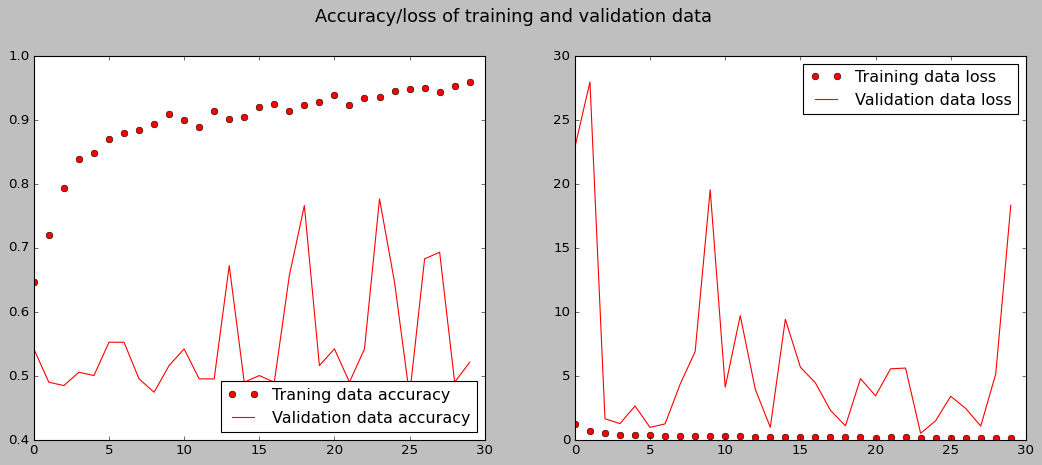

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.style.use('classic')
plt.plot(epochs, acc, 'ro', label = 'Traning data accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation data accuracy')
plt.legend(loc=4)

plt.subplot(122)
plt.style.use('classic')
plt.plot(epochs, loss, 'ro', label = 'Training data loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation data loss')
plt.legend(loc=1)

plt.suptitle(t = 'Accuracy/loss of training and validation data', 
             x = 0.5, 
             y = 1, 
             fontsize = 16)
plt.show()

In [ ]:
saved_model_1 = load_model('model_plain.14-0.67.hdf5')
saved_model_2 = load_model('model_plain.19-0.77.hdf5')
saved_model_3 = load_model('model_plain.24-0.78.hdf5')

test_loss_1, test_accuracy_1 = saved_model_1.evaluate(test_generator, steps=1)
test_loss_2, test_accuracy_2 = saved_model_2.evaluate(test_generator, steps=1)
test_loss_3, test_accuracy_3 = saved_model_3.evaluate(test_generator, steps=1)

x = min(test_loss_1, test_loss_2, test_loss_3)
y = max(test_accuracy_1, test_accuracy_2, test_accuracy_3)

print("\n")
if(y == test_accuracy_1):
  print("Model 1 is the best !")
  best_model = saved_model_1
elif(y == test_accuracy_2):
  print("Model 2 is the best !")
  best_model = saved_model_2
elif(y == test_accuracy_3):
  print("Model 3 is the best !")
  best_model = saved_model_3

1/1 [==============================] - 2s 2s/step - loss: 0.5768 - binary_accuracy: 0.7640


Model 3 is the best !


In [ ]:
best_model.evaluate(test_generator)

1/1 [==============================] - 1s 1s/step - loss: 0.5768 - binary_accuracy: 0.7640


[0.5768431425094604, 0.7639999985694885]

In [ ]:
y_pred = (best_model.predict(test_generator) > 0.5).astype("int32")
Y_labels = test_generator.classes

Text(0.5, 159.39999999999995, 'Predicted')

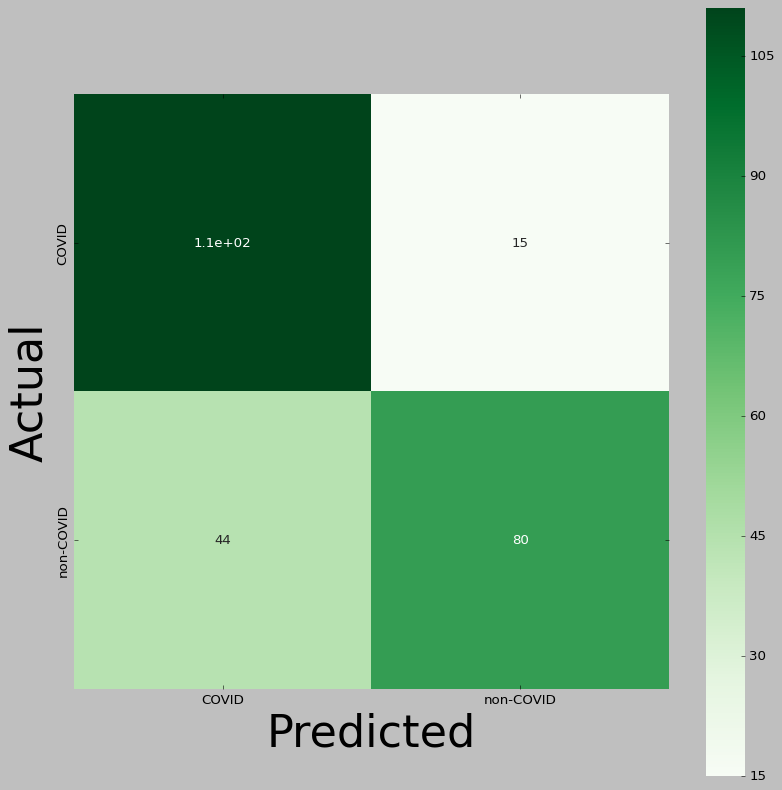

In [ ]:
disease_types=['COVID', 'non-COVID']

cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:
y_pred_1 = y_pred
print(confusion_matrix(test_generator.classes, y_pred_1))
print('Classification Report')
target_names = ['Covid', 'NON-Covid']
print(classification_report(test_generator.classes, y_pred_1, target_names=target_names))
print('\n')

[[111  15]
 [ 44  80]]
Classification Report
              precision    recall  f1-score   support

       Covid       0.72      0.88      0.79       126
   NON-Covid       0.84      0.65      0.73       124

    accuracy                           0.76       250
   macro avg       0.78      0.76      0.76       250
weighted avg       0.78      0.76      0.76       250





In [ ]:
history = model.fit_generator(
train_generator,
steps_per_epoch = train_steps,
epochs = 30,
validation_data = validation_generator,
validation_steps = val_steps,
shuffle = True,
callbacks = cb_list_1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
31/31 [==============================] - 16s 502ms/step - loss: 0.6253 - binary_accuracy: 0.7329 - val_loss: 9.5121 - val_binary_accuracy: 0.5000

Epoch 00001: val_binary_accuracy improved from -inf to 0.50000, saving model to model.01-0.50.hdf5
Epoch 2/30
31/31 [==============================] - 15s 486ms/step - loss: 0.4619 - binary_accuracy: 0.8014 - val_loss: 0.4867 - val_binary_accuracy: 0.7865

Epoch 00002: val_binary_accuracy improved from 0.50000 to 0.78646, saving model to model.02-0.79.hdf5
Epoch 3/30
31/31 [==============================] - 15s 492ms/step - loss: 0.4118 - binary_accuracy: 0.8140 - val_loss: 0.5464 - val_binary_accuracy: 0.7031

Epoch 00003: val_binary_accuracy did not improve from 0.78646
Epoch 4/30
31/31 [==============================] - 15s 489ms/step - loss: 0.3926 - binary_accuracy: 0.8271 - val_loss: 0.4648 - val_binary_accuracy: 0.8385

Epoch 00004: val_binary_accuracy improved from 0.78646 to 0.83854, saving model to model.04-0.84.hdf5
Epo

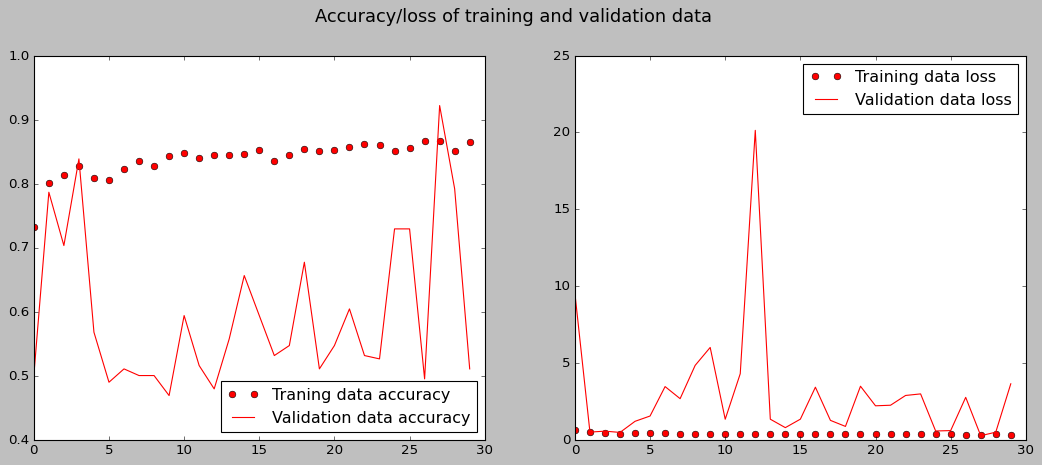

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.style.use('classic')
plt.plot(epochs, acc, 'ro', label = 'Traning data accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation data accuracy')
plt.legend(loc=4)

plt.subplot(122)
plt.style.use('classic')
plt.plot(epochs, loss, 'ro', label = 'Training data loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation data loss')
plt.legend(loc=1)

plt.suptitle(t = 'Accuracy/loss of training and validation data', 
             x = 0.5, 
             y = 1, 
             fontsize = 16)
plt.show()

In [ ]:
# Best 3 models saved 

saved_model_1 = load_model('model.02-0.79.hdf5')
saved_model_2 = load_model('model.04-0.84.hdf5')
saved_model_3 = load_model('model.28-0.92.hdf5')

1/1 [==============================] - 1s 1s/step - loss: 0.6401 - binary_accuracy: 0.6320


In [ ]:
test_loss_1, test_accuracy_1 = saved_model_1.evaluate(test_generator, steps=1)
test_loss_2, test_accuracy_2 = saved_model_2.evaluate(test_generator, steps=1)
test_loss_3, test_accuracy_3 = saved_model_3.evaluate(test_generator, steps=1)

x = min(test_loss_1, test_loss_2, test_loss_3)
y = max(test_accuracy_1, test_accuracy_2, test_accuracy_3)

print("\n")
if(y == test_accuracy_1):
  print("Model 1 is the best !")
  best_model = saved_model_1
elif(y == test_accuracy_2):
  print("Model 2 is the best !")
  best_model = saved_model_2
elif(y == test_accuracy_3):
  print("Model 3 is the best !")
  best_model = saved_model_3

1/1 [==============================] - 2s 2s/step - loss: 0.3395 - binary_accuracy: 0.8800


Model 3 is the best !


In [ ]:
print("Model testing:" + "\n")
print('Test loss: %4.2f' % (test_loss_3))
print('Test accuracy: %4.2f' % (test_accuracy_3) + "%")

Model testing:

Test loss: 0.34
Test accuracy: 0.88%


In [ ]:
best_model.evaluate(test_generator)

1/1 [==============================] - 1s 1s/step - loss: 0.3395 - binary_accuracy: 0.8800


[0.339488685131073, 0.8799999952316284]

In [ ]:
#y_pred = best_model.predict_classes(test_generator)
#y_pred = best_model.predict(test_generator)
y_pred = (best_model.predict(test_generator) > 0.5).astype("int32")
Y_labels = test_generator.classes

Text(0.5, 159.39999999999995, 'Predicted')

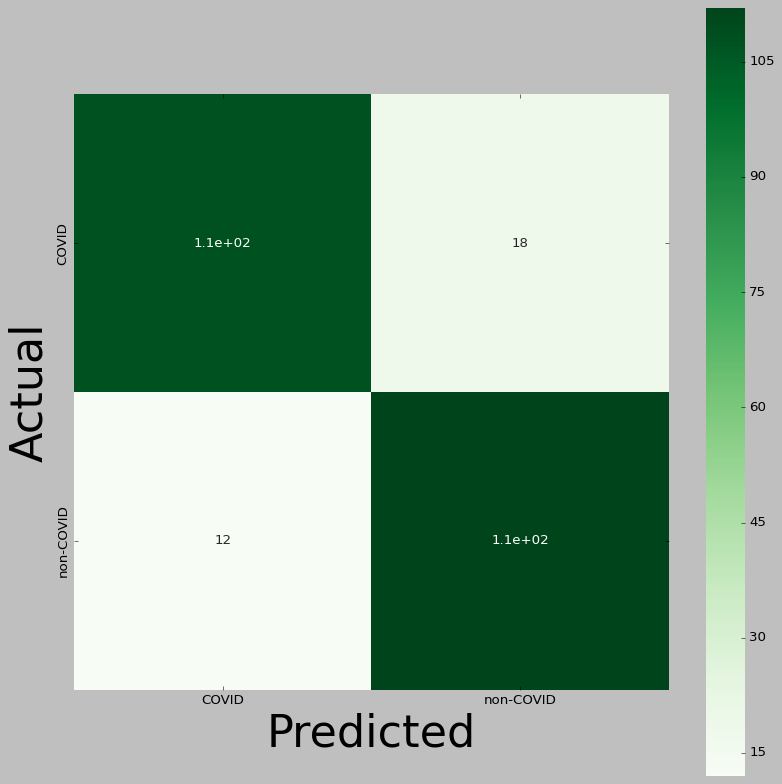

In [ ]:
disease_types=['COVID', 'non-COVID']

cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:
y_pred_1 = y_pred
print(confusion_matrix(test_generator.classes, y_pred_1))
print('Classification Report')
target_names = ['Covid', 'NON-Covid']
print(classification_report(test_generator.classes, y_pred_1, target_names=target_names))
print('\n')

[[108  18]
 [ 12 112]]
Classification Report
              precision    recall  f1-score   support

       Covid       0.90      0.86      0.88       126
   NON-Covid       0.86      0.90      0.88       124

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250





In [ ]:
while True : pass

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.applications import DenseNet121
from keras.models import Input

def build_densenet():
    densenet = DenseNet121(weights = 'imagenet', include_top = False)

    input = Input(shape=(128, 128, 3))
    x = Conv2D(3, (3, 3), padding='same')(input)
    
    x = densenet(x)
    
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    output = Dense(1, activation = 'sigmoid', name='root')(x)
 
    model = Model(input, output)
    
    optimizer = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, 
                                epsilon=0.1, decay=0.0)
    model.compile(loss = 'binary_crossentropy', 
                  optimizer = optimizer, metrics=['binary_accuracy'])
    
    return model



NameError: ignored

In [ ]:
model = build_densenet()
model.summary()
annealer = ReduceLROnPlateau(monitor='val_binary_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

29089792/29084464 [==============================] - 0s 0us/step
The following Variables were used a Lambda layer's call (tf.nn.convolution), but
are not present in its tracked objects:
  <tf.Variable 'conv1/conv/kernel:0' shape=(7, 7, 3, 64) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm), but
are not present in its tracked objects:
  <tf.Variable 'conv1/bn/gamma:0' shape=(64,) dtype=float32>
  <tf.Variable 'conv1/bn/beta:0' shape=(64,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_1

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
history = model.fit_generator(train_generator,
               steps_per_epoch = train_steps,
               epochs=46 ,
               verbose=2,
               validation_data = validation_generator,
               validation_steps = val_steps)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/46
31/31 - 17s - loss: 0.5859 - binary_accuracy: 0.7233 - val_loss: 0.5023 - val_binary_accuracy: 0.7500
Epoch 2/46
31/31 - 17s - loss: 0.5091 - binary_accuracy: 0.7581 - val_loss: 0.4902 - val_binary_accuracy: 0.7552
Epoch 3/46
31/31 - 17s - loss: 0.4875 - binary_accuracy: 0.7686 - val_loss: 0.4746 - val_binary_accuracy: 0.7604
Epoch 4/46
31/31 - 17s - loss: 0.4861 - binary_accuracy: 0.7742 - val_loss: 0.4612 - val_binary_accuracy: 0.7969
Epoch 5/46
31/31 - 17s - loss: 0.4685 - binary_accuracy: 0.7797 - val_loss: 0.4835 - val_binary_accuracy: 0.7552
Epoch 6/46
31/31 - 17s - loss: 0.4671 - binary_accuracy: 0.7858 - val_loss: 0.4651 - val_binary_accuracy: 0.7708
Epoch 7/46
31/31 - 17s - loss: 0.4594 - binary_accuracy: 0.7802 - val_loss: 0.4789 - val_binary_accuracy: 0.7708
Epoch 8/46
31/31 - 17s - loss: 0.4554 - binary_accuracy: 0.7903 - val_loss: 0.4589 - val_binary_accuracy: 0.7708
Epoch 9/46
31/31 - 17s - loss: 0.4578 - binary_accuracy: 0.7878 - val_loss: 0.4499 - val_binary_

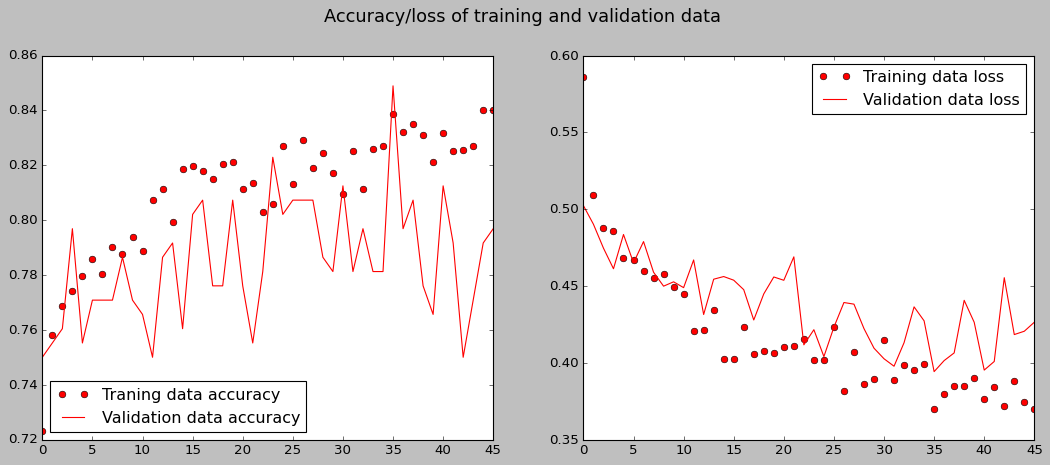

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.style.use('classic')
plt.plot(epochs, acc, 'ro', label = 'Traning data accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation data accuracy')
plt.legend(loc = 3)

plt.subplot(122)
plt.style.use('classic')
plt.plot(epochs, loss, 'ro', label = 'Training data loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation data loss')
plt.legend(loc = 1)

plt.suptitle(t = 'Accuracy/loss of training and validation data', 
             x = 0.5, 
             y = 1, 
             fontsize = 16)
plt.show()

In [ ]:
#model.evaluate(test_generator)

Y_pred = (model.predict(test_generator, steps=1) > 0.5).astype("int32")
Y_labels = test_generator.classes

In [ ]:
Y_pred_1 = Y_pred
print('Best model without augmentation')
print(confusion_matrix(test_generator.classes, Y_pred_1))
print('Classification Report')
target_names = ['Covid', 'NON-Covid']
print(classification_report(test_generator.classes, Y_pred_1, target_names=target_names))
print('\n')

Best model without augmentation
[[ 88  38]
 [ 17 107]]
Classification Report
              precision    recall  f1-score   support

       Covid       0.84      0.70      0.76       126
   NON-Covid       0.74      0.86      0.80       124

    accuracy                           0.78       250
   macro avg       0.79      0.78      0.78       250
weighted avg       0.79      0.78      0.78       250





Text(0.5, 189.79999999999995, 'Predicted')

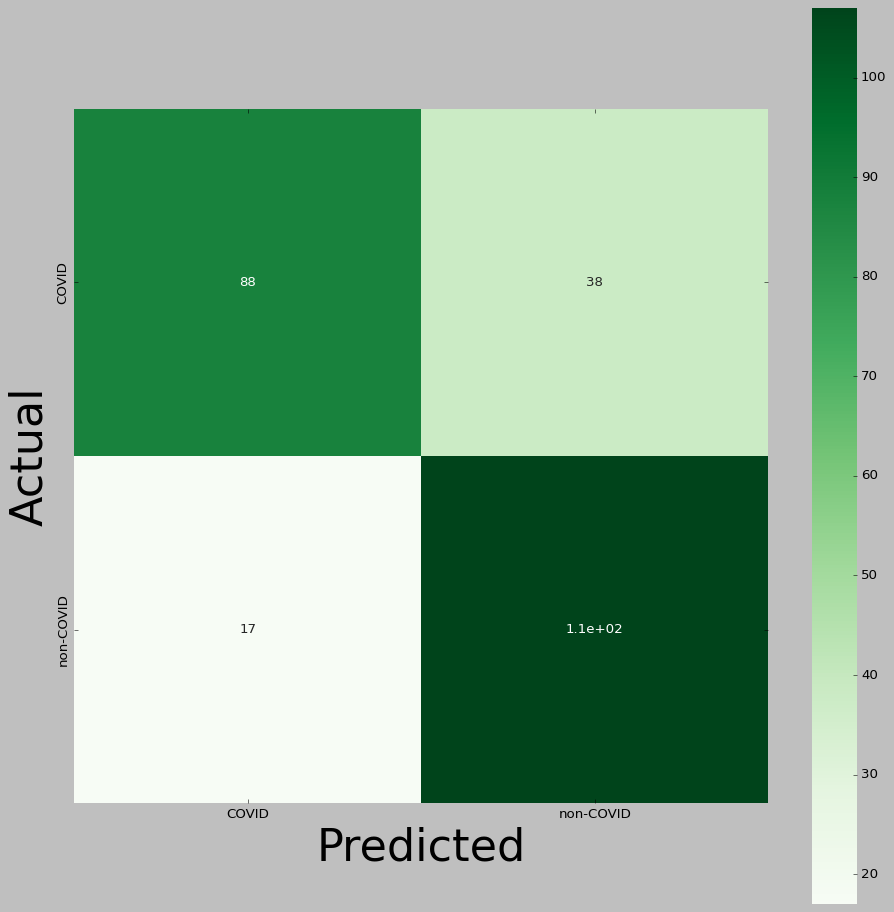

In [ ]:
disease_types=['COVID', 'non-COVID']

cm = confusion_matrix(test_generator.classes, Y_pred_1)
plt.figure(figsize=(14, 14))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)
ax.set_ylabel('Actual', fontsize = 40)
ax.set_xlabel('Predicted', fontsize = 40)

In [ ]:
while True:pass